<a href="https://colab.research.google.com/github/ijenims/paiza/blob/main/Profitable_AI_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonで儲かるAIをつくる

https://github.com/makaishi2/profitable_ai_book_info

## 3章　機械学習モデルの開発手順

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch03_03_first_ml.ipynb

2022.3.16～

In [2]:
!pip install japanize-matplotlib | tail -n 1    # 日本語化ライブラリ

In [3]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# ライブタリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# Numpyの表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

In [4]:
# がん疾患データセットのロード

# ライブラリのimport
from sklearn.datasets import load_breast_cancer

# データのロード
cancer = load_breast_cancer()

# データの注釈を読む
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# データフレームへの取り込み

columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

# ロードしたデータのデータフレームへの取り込み
df = pd.DataFrame(cancer.data, columns=columns)

# 正解データの取得
y = pd.Series(cancer.target)

In [6]:
df

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.5600,22.3900,142.0000,1479.0000,0.1110,0.1159,0.2439,0.1389,0.1726,0.0562,1.1760,1.2560,7.6730,158.7000,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042,25.4500,26.4000,166.1000,2027.0000,0.1410,0.2113,0.4107,0.2216,0.2060,0.0712
565,20.1300,28.2500,131.2000,1261.0000,0.0978,0.1034,0.1440,0.0979,0.1752,0.0553,0.7655,2.4630,5.2030,99.0400,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025,23.6900,38.2500,155.0000,1731.0000,0.1166,0.1922,0.3215,0.1628,0.2572,0.0664
566,16.6000,28.0800,108.3000,858.1000,0.0846,0.1023,0.0925,0.0530,0.1590,0.0565,0.4564,1.0750,3.4250,48.5500,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039,18.9800,34.1200,126.7000,1124.0000,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,20.6000,29.3300,140.1000,1265.0000,0.1178,0.2770,0.3514,0.1520,0.2397,0.0702,0.7260,1.5950,5.7720,86.2200,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062,25.7400,39.4200,184.6000,1821.0000,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240


In [7]:
display(df[20:25])

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [8]:
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [9]:
print(df.shape)
print()

print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [10]:
# 散布図描画の準備
# データを正解データ=0 のグループと正解データ=1 のグループに分割する

# 正解データ＝０（悪性）
df0 = df[y==0]

# 正解データ＝１（良性）
df1 = df[y==1]

display(df0.head())
display(df1.head())

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


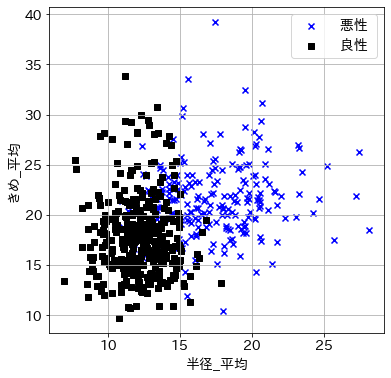

In [11]:
# 散布図表示

plt.figure(figsize=(6, 6))

plt.scatter(df0['半径_平均'], df0['きめ_平均'], marker='x', c='b', label=' 悪性 ')
plt.scatter(df1['半径_平均'], df1['きめ_平均'], marker='s', c='k', label=' 良性 ')

plt.grid()

plt.xlabel('半径_平均')
plt.ylabel('きめ_平均')

plt.legend()

plt.show()

In [12]:
input_columns = ['半径_平均', 'きめ_平均']
x = df[input_columns]
display(x.head())

,半径_平均,きめ_平均
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


In [13]:
# 訓練データと検証データの分割

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [14]:
# 分割結果の確認（要素数）

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [15]:
display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,半径_平均,きめ_平均
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,半径_平均,きめ_平均
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

In [16]:
# アルゴリズム選択

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

In [17]:
# 学習

algorithm.fit(x_train, y_train)
print(algorithm)

LogisticRegression(random_state=123)


In [18]:
# 予測

y_pred = algorithm.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


In [19]:
# 正解データと予測結果の比較

# 正解データ　先頭から10個
# y_testは DataFrameなので、valuesにより NumPyに変換しておく
y_test10 = y_test[:10].values
print(y_test10)

# 予測結果　先頭から10個
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [20]:
# 正解数のカウント

# 正解データ＝予測結果
w1 = (y_test10 == y_pred10)
print(w1)

# 正解データの数
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [21]:
# 精度の計算

# 正解数
w = (y_test.values == y_pred)
correct = w.sum()

# 検証データ全体数
N = len(w)

# 精度＝（正解数）／（検証データ全体数）
score = correct / N

# 結果表示
print(f'精度： {score:.04f}')

精度： 0.8772


In [22]:
# score関数の利用

score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


In [23]:
# モデルの精度を上げる

# オリジナルの30項目の入力データを使う
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# ロジスティック回帰モデルのインスタントを新たに作り直す
algorithm2 = LogisticRegression(random_state=random_seed)

# 訓練データで学習
algorithm2.fit(x2_train, y_train)

# 検証データで精度を確認
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649


## 4章　機械学習モデル開発の重要ポイント

### 4.1 データ確認

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_01_data_process.ipynb

#### 4.1.1 数値的・統計的に分析する方法 - titanic -

In [24]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

# 項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', 
             '両親子供数', '料金', '乗船港コード', '等室名', 
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']

df_titanic.columns = columns_t

df_titanic.head()

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# 欠損値の調査

df_titanic.isnull().sum()

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64

In [26]:
# 項目「乗船港」の項目ごとの個数
print(df_titanic['乗船港'].value_counts())
print()

# 項目「生存可否」の項目ごとの個数
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


In [27]:
# 統計情報の調査

df_titanic.describe()

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [28]:
# 集約関数の利用

df_titanic.groupby('性別').mean()

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


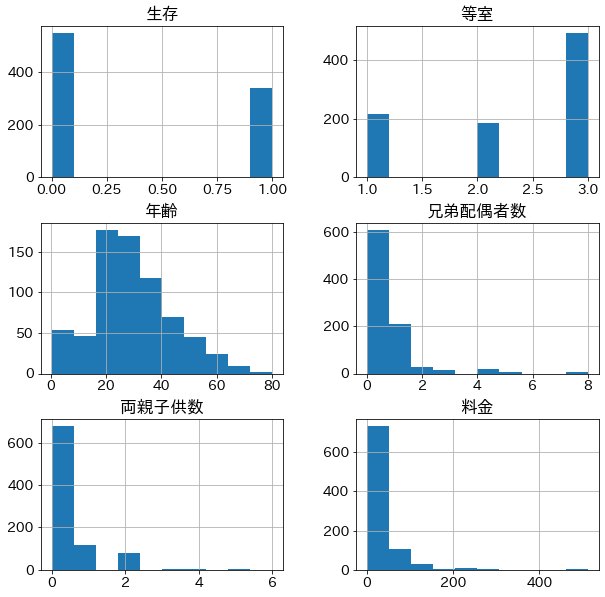

In [29]:
# 分析対象項目のグラフ表示（数値項目）

# 数値項目の定義
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

# グラフ表示領域の調整
plt.rcParams['figure.figsize'] = (10, 10)

# データフレームの数値項目でヒストグラム表示
df_titanic[columns_n].hist()
plt.show()

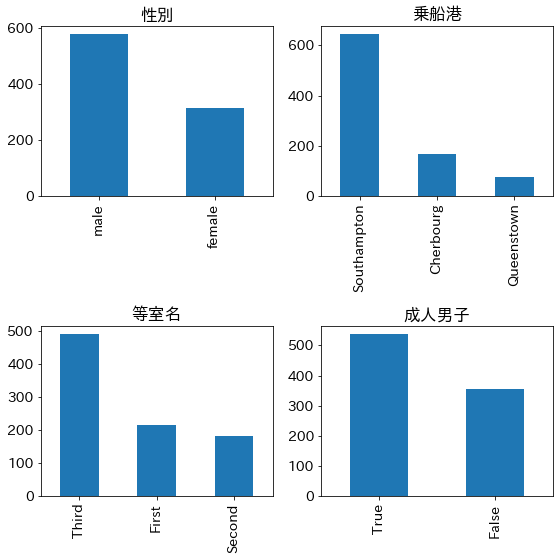

In [30]:
# 分析対象項目のグラフ表示（非数値項目）

# グラフ化対象の定義
columns_c = ['性別', '乗船港', '等室名', '成人男子']

# グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (8, 8)

# ループ処理でヒストグラムの表示
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)

# レイアウトの調整
plt.tight_layout()
plt.show()

#### 4.1.2 視覚的に分析・確認する方法 - iris -

In [31]:
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 項目名の日本語化
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# データの内容
display(df_iris.head())


,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


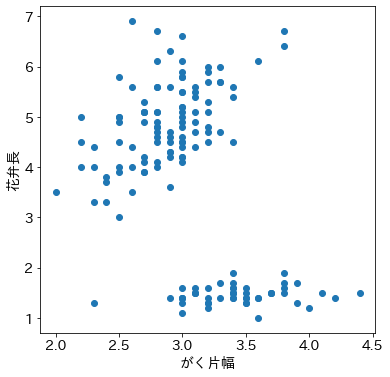

In [32]:
# 散布図表示 matplotlib 版

# グラフ描画領域の調整
plt.figure(figsize=(6, 6))

# 散布図の表示
plt.scatter(df_iris['がく片幅'], df_iris['花弁長'])

# ラベル表示
# sepal がく petal 花弁
plt.xlabel('がく片幅')
plt.ylabel('花弁長')
plt.show()

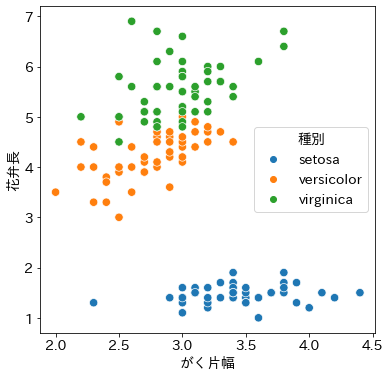

In [33]:
# 散布図表示 seaborn 版 (1)

# グラフ描画領域の調整
plt.figure(figsize=(6, 6))

# 散布図の表示
sns.scatterplot(x='がく片幅', y='花弁長', hue='種別', s=70, data=df_iris)

plt.show()

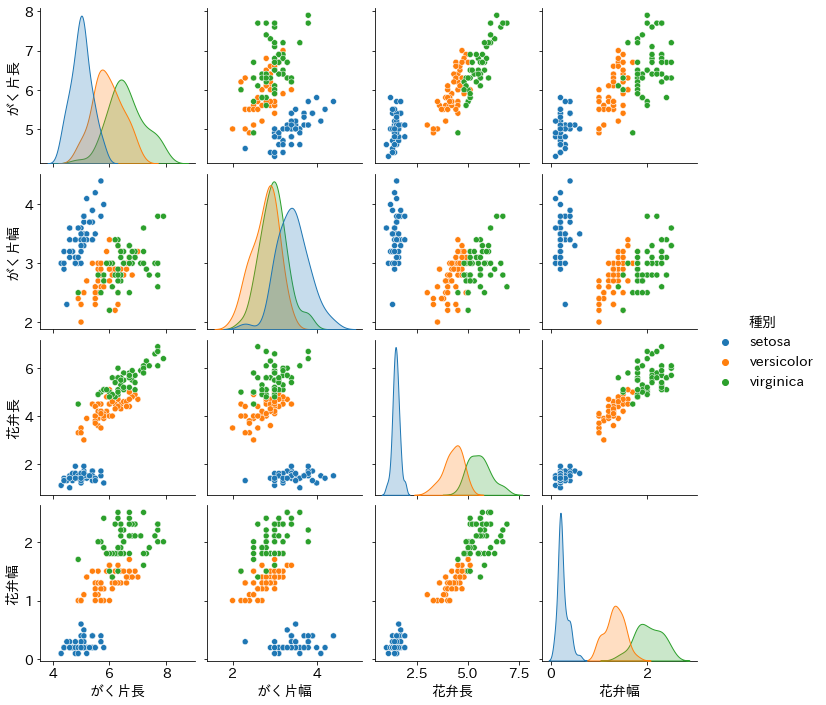

In [34]:
# 全散布図同時表示

sns.pairplot(df_iris, hue='種別')
plt.show()

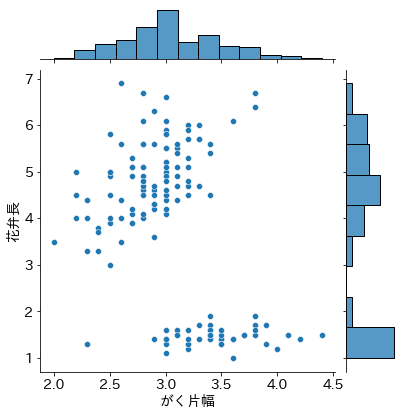

In [35]:
# 散布図表示 seaborn 版 (2)

sns.jointplot('がく片幅', '花弁長', data=df_iris)
plt.show()

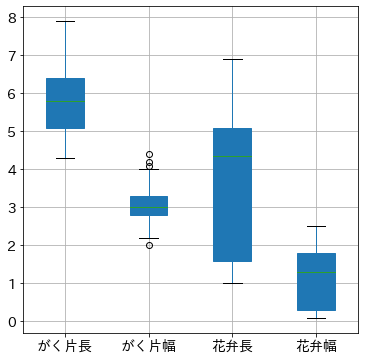

In [36]:
# 箱ひげ図表示 matplotlib 版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

# 箱ひげ図の描画
df_iris.boxplot(patch_artist=True)
plt.show()

In [37]:
# seaborn 箱ひげ図の準備

# melt 関数によるデータの事前加工
w = pd.melt(df_iris, id_vars=['種別'])

# 加工結果の確認
display(w.head())

,種別,variable,value
0,setosa,がく片長,5.1000
1,setosa,がく片長,4.9000
2,setosa,がく片長,4.7000
3,setosa,がく片長,4.6000
4,setosa,がく片長,5.0000


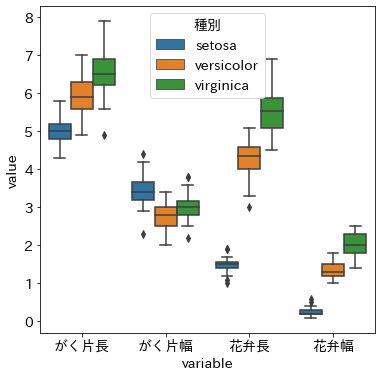

In [38]:
# seaborn による箱ひげ図表示

# hue パラメータを追加し、花の種類で箱ひげ図を書き分ける
plt.figure(figsize=(6,6))
sns.boxplot(x='variable', y='value', data=w, hue='種別')
plt.show()

### 4.2 データ前処理

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_02_data_preprocess.ipynb

#### 4.2.1 不要な項目の削除

In [39]:
# 2022.3.21

# 余分な列削除

# '等室名'（'等室'と同じ）
df1 = df_titanic.drop('等室名', axis=1)

# '乗船港'（'乗船港コード'と同じ）
df2 = df1.drop('乗船港', axis=1)

# '生存可否'（'生存'と同じ）
df3 = df2.drop('生存可否', axis=1)

display(df3.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


#### 4.2.2 欠損値の対応

In [40]:
# 欠損値確認

display(df3.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
男女子供        0
成人男子        0
デッキ       688
独身          0
dtype: int64

In [41]:
display(df3['デッキ'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: デッキ, dtype: int64

In [42]:
### 欠損値対応

## 乗船港コード：　欠損行数が２件と少ない
#   →　行ごと削除する

# dropna 関数を利用する
df4 = df3.dropna(subset = ['乗船港コード'])

## 年齢：　数値データであり欠損行数が177行とかなり多い
#   →　他データの平均値で代用

# 平均値の計算
age_avarage = df4['年齢'].mean()

# fillna 関数の利用
df5 = df4.fillna({'年齢': age_avarage})

## デッキ：　ラベル値データであり欠損行数が688行と相当多い
#    →　欠損を意味するダミーコードは 'N' とする

# replace 関数の利用（ダミーコードは 'N' とする）  ←　動かなくなったため代替案
# df6 = df5.replace({'デッキ': {np.NaN: 'N'}})

df5['デッキ'] = df5['デッキ'].astype(object)
df6 = df5.fillna({'デッキ': 'N'})

In [43]:
# 結果確認
display(df6.isnull().sum())

display(df6.head())

生存        0
等室        0
性別        0
年齢        0
兄弟配偶者数    0
両親子供数     0
料金        0
乗船港コード    0
男女子供      0
成人男子      0
デッキ       0
独身        0
dtype: int64

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,male,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,N,True


#### 4.2.3 2値ラベルの数値化

In [44]:
# 辞書 mf_map の定義
mf_map = {'male': 1, 'female': 0}

# map 関数を利用して数値化
df7 = df6.copy()
df7['性別'] = df7['性別'].map(mf_map)

display(df7.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,True,N,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,N,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,N,True


In [45]:
# 辞書 tf_map の定義
tf_map = {True: 1, False: 0}

# map関数を利用して数値化
df8 = df7.copy()
df8['成人男子'] = df8['成人男子'].map(tf_map)

# map関数を利用して数値化
df9 = df8.copy()
df9['独身'] = df8['独身'].map(tf_map)

display(df9.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,男女子供,成人男子,デッキ,独身
0,0,3,1,22.0000,1,0,7.2500,S,man,1,N,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,N,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,N,1


#### 4.2.4 多値ラベルの数値化

In [46]:
# get_dummies 関数の利用サンプル

w = pd.get_dummies(df9['男女子供'], prefix='男女子供')
display(w.head(10))

,男女子供_child,男女子供_man,男女子供_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


In [47]:
# 2022.3.25

# get_dummies 関数でカテゴリ値を one hot vector に展開する関数を定義
# df : 対象データフレーム
# column : 対象列

def enc(df, column):
    # One Hot Vector 生成
    df_dummy = pd.get_dummies(df[column], prefix=column)

    # 元列の削除
    df_drop = df.drop([column], axis=1)

    # 削除したデータフレームと One Hot 生成列を連結
    df1 = pd.concat([df_drop, df_dummy], axis=1)
    return df1


In [48]:
# 項目値の確認
display(df9['男女子供'].value_counts())

man      537
woman    269
child     83
Name: 男女子供, dtype: int64

In [49]:
# One Hot エンコーディング

# 男女子供
df10 = enc(df9, '男女子供')

display(df10.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,成人男子,デッキ,独身,男女子供_child,男女子供_man,男女子供_woman
0,0,3,1,22.0000,1,0,7.2500,S,1,N,0,0,1,0
1,1,1,0,38.0000,1,0,71.2833,C,0,C,0,0,0,1
2,1,3,0,26.0000,0,0,7.9250,S,0,N,1,0,0,1
3,1,1,0,35.0000,1,0,53.1000,S,0,C,0,0,0,1
4,0,3,1,35.0000,0,0,8.0500,S,1,N,1,0,1,0


In [50]:
df11 = enc(df10, '乗船港コード')

df12 = enc(df11, 'デッキ')

display(df12.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


#### 4.2.5 正規化

In [51]:
# standardization

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

df13 = df12.copy()
df13[['年齢', '料金']] = stdsc.fit_transform(df13[['年齢', '料金']])

display(df13.head())


,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身,男女子供_child,男女子供_man,男女子供_woman,乗船港コード_C,乗船港コード_Q,乗船港コード_S,デッキ_A,デッキ_B,デッキ_C,デッキ_D,デッキ_E,デッキ_F,デッキ_G,デッキ_N
0,0,3,1,-0.5896,1,0,-0.5002,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0.6448,1,0,0.7889,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,-0.2810,0,0,-0.4866,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0.4134,1,0,0.4229,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,0.4134,0,0,-0.4841,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


### 4.3 アルゴリズム選択

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_03_algorithm.ipynb

#### 4.3.2 サンプルコードで用いるデータ

In [52]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# 線形分離型
X1, y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, 
    random_state=random_seed, n_clusters_per_class=1, 
    n_samples=200, n_classes=2
    )

# 三日月型（線形分離不可）
X2, y2 = make_moons(
    noise = 0.05, random_state=random_seed, n_samples=200
    )

# 円形（線形分離不可）
X3, y3 = make_circles(
    noise = 0.02, random_state=random_seed, n_samples=200
    )

# 3種類のデータを DataList に保存
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N : データの種類数
N = len(DataList)


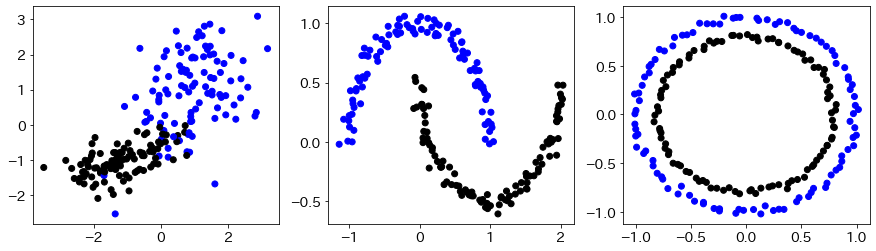

In [53]:
# 散布図表示
plt.figure(figsize=(15,4))

# カラーマップ定義
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

plt.show()

In [54]:
# （サポートページより）

from sklearn.model_selection import train_test_split

# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'検証:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 
    

In [55]:
# （サポートページより）

# 散布図と決定境界の表示関数

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

#### 4.3.3 ロジスティック回帰

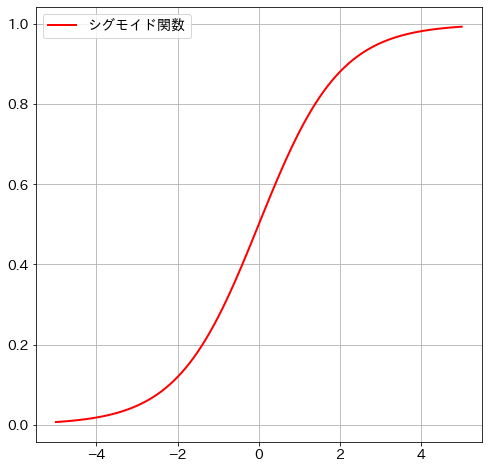

In [56]:
# 2022.3.26

# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# x のデータ準備
x = np.linspace(-5, 5, 101)

# y のデータ準備
y = sigmoid(x)

# グラフ表示
plt.plot(x, y, label='シグモイド関数', c='r', lw=2)
plt.legend()  # 凡例
plt.grid()    # 方眼
plt.show()

LogisticRegression(random_state=123)


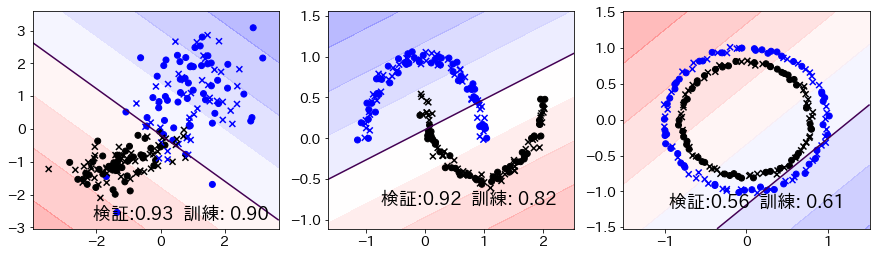

In [57]:
# ロジスティック回帰の散布図・分類結果表示

# アルゴリズム選択
from sklearn.linear_model import LogisticRegression

argorithm = LogisticRegression(random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(argorithm)

# 表示関数の呼び出し
plot_boundaries(argorithm, DataList)

#### 4.3.4 サポートベクターマシン（カーネル）

SVC()


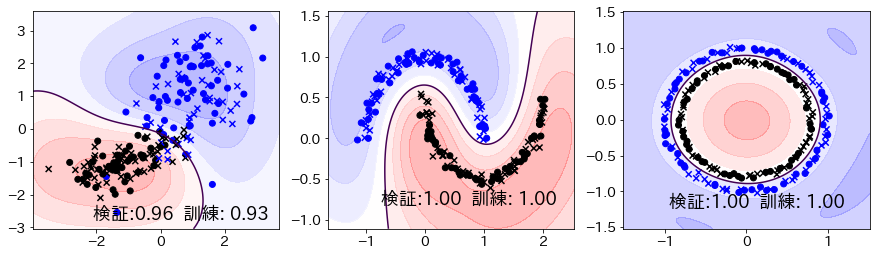

In [58]:
# SVM（カーネル）の散布図・分類結果表示

# アルゴリズムの選択
from sklearn.svm import SVC

algorithm = SVC(kernel='rbf')

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

#### 4.3.5 ニューラルネットワーク

MLPClassifier(random_state=123)


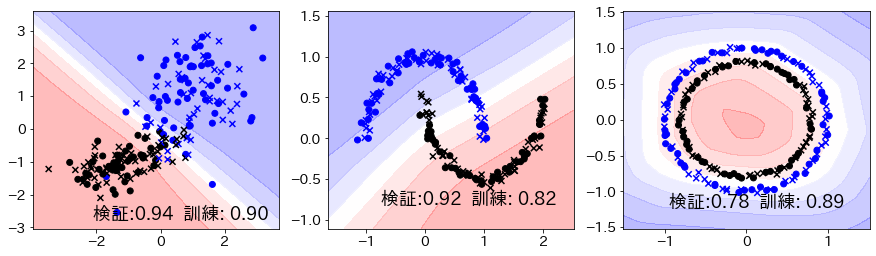

In [59]:
# ニューラルネットワークの散布図・分類結果表示

# アルゴリズムの選択
from sklearn.neural_network import MLPClassifier

algorithm = MLPClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=123)


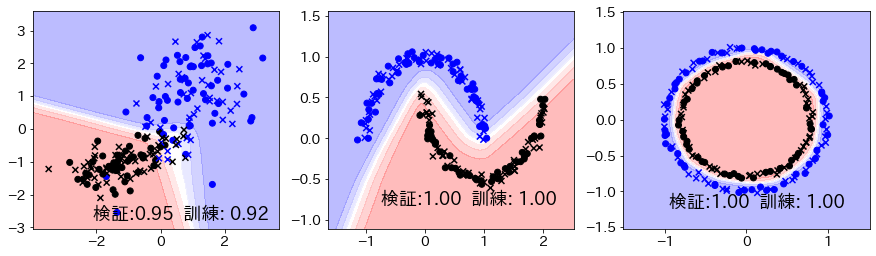

In [60]:
# ニューラルネットワークの散布図・分類結果表示

# アルゴリズムの選択
from sklearn.neural_network import MLPClassifier
# 隠れ層ノード数 = (100, 100)
algorithm = MLPClassifier(hidden_layer_sizes=(100,100),
                          random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

#### 4.3.6 決定木

In [61]:
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 2種類の花に絞り込み
df2 = df_iris[50:150]

# データ分離
X = df2.drop('species', axis=1)
y = df2['species']

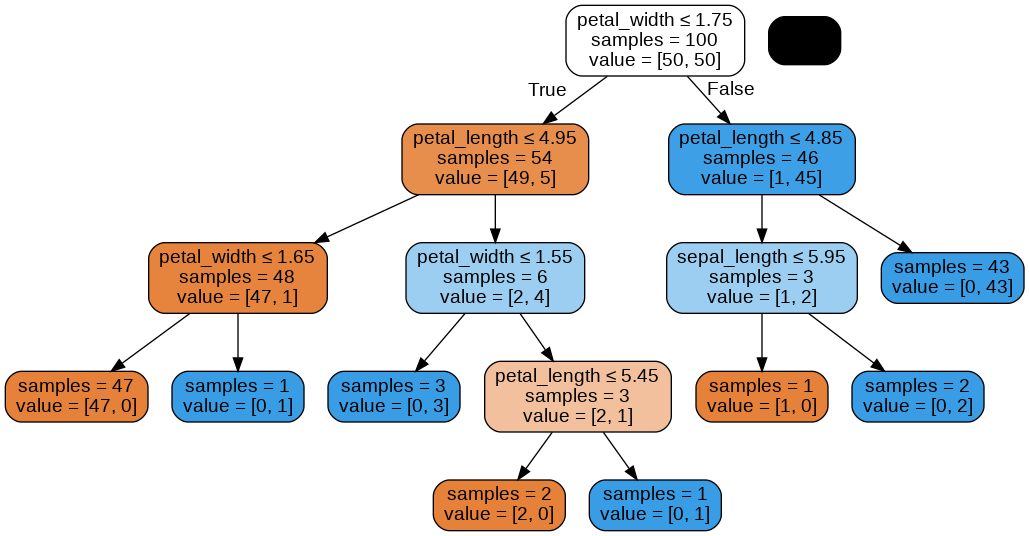

In [62]:
# 学習
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

# 決定木のツリー表示
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( 
        algorithm, out_file=f, feature_names=X.columns, filled=True,
        rounded=True, special_characters=True, impurity=False,
        proportion=False
        )
    
import pydotplus
from IPython.display import Image

graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())
    


DecisionTreeClassifier(random_state=123)


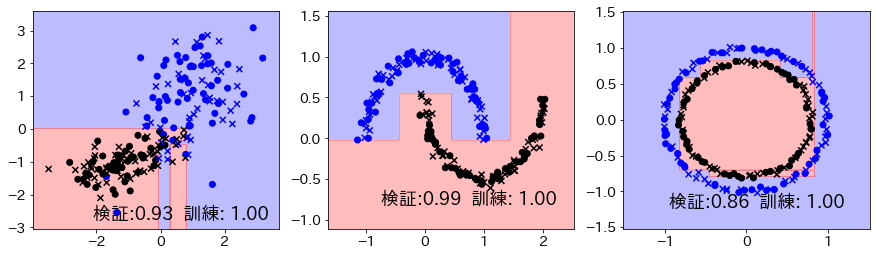

In [63]:
# 決定木の散布図・分類結果表示

# アルゴリズムの選択
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

DecisionTreeClassifier(max_depth=3, random_state=123)


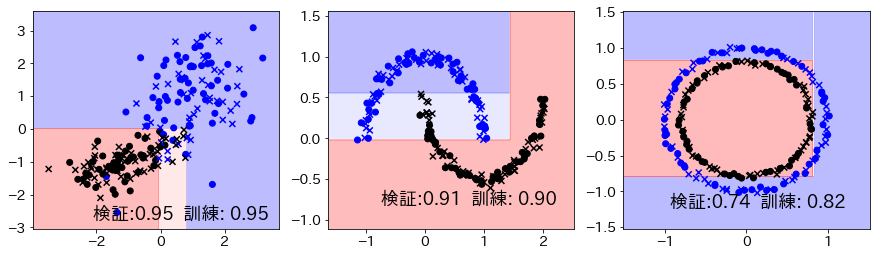

In [64]:
# 決定木の散布図・分類結果表示

# アルゴリズムの選択
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(max_depth=3, 
                                   random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

#### 4.3.7 ランダムフォレスト

RandomForestClassifier(random_state=123)


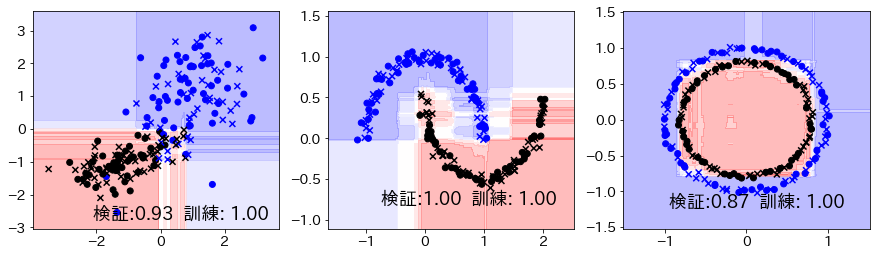

In [65]:
# ランダムフォレストの散布図・分類結果表示

# アルゴリズムの選択
from sklearn.ensemble import RandomForestClassifier

algorithm = RandomForestClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

#### 4.3.8 XGBoost

XGBClassifier(random_state=123)


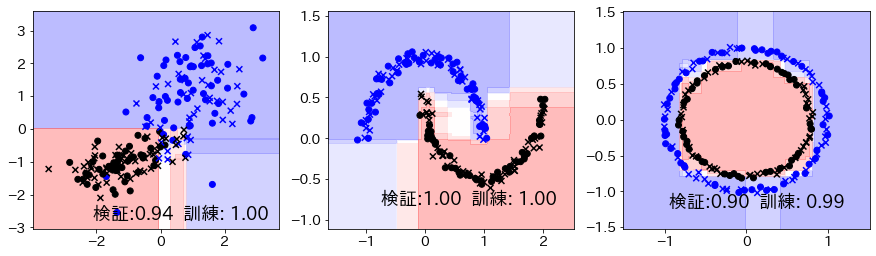

In [66]:
# XGBoostの散布図・分類結果表示

# アルゴリズムの選択
import xgboost

algorithm = xgboost.XGBClassifier(random_state=random_seed)

# アルゴリズムの持つパラメータの表示
print(algorithm)

# 表示関数の呼び出し
plot_boundaries(algorithm, DataList)

### 4.4 評価

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_04_estimate.ipynb

#### 4.4.1 混同行列

In [67]:
# 2022.3.31

# データ読み込みからデータ分割まで

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 入力データ x
x = cancer.data
# print(x)

# 正解データ y
# 良性: 0, 悪性: 1 に値を変更する
y = 1 - cancer.target

# 入力データを２次元に絞り込み
x2 = x[:, :2]
# print(x2)

# データ分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x2, y, train_size=0.7, test_size=0.3, random_state=random_seed)

In [68]:
# アルゴリズム選択から評価まで

from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 評価
score = algorithm.score(x_test, y_test)

# 結果確認
print(f'score: {score:.4f}')

score: 0.8772


In [69]:
# 混同行列の計算

from sklearn.metrics import confusion_matrix

# 混同行列の生成
#  y_test: 検証データの正解データ
#  x_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[101   2]
 [ 19  49]]


In [70]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy 配列

    # columns 項目名リスト
    n = len(columns)

    # '正解データ' を n 回繰り返すリストを生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n

    # データフレーム生成
    cm = pd.DataFrame(
        matrix, columns=[pred, columns], index=[act, columns])
    
    return cm


In [71]:
# make_cm を使った混同行列の表示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性   19  49

#### 4.4.2 精度・適合率・再現率・F値

In [72]:
# 適合率・再現率・F値の計算

from sklearn.metrics import precision_recall_fscore_support

# 適合率・再現率・F値の計算
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary')

# 結果の確認
print(f'適合率： {precision:.4f}')
print(f'再現率： {recall:.4f}')
print(f'F値：　　{fscore:.4f}')

適合率： 0.9608
再現率： 0.7206
F値：　　0.8235


#### 4.4.3 確率値と閾値

In [73]:
# 2022.4.2

# 確率値の取得

y_proba = algorithm.predict_proba(x_test)
print(y_proba[:10, :])

[[0.9925 0.0075]
 [0.9981 0.0019]
 [0.0719 0.9281]
 [0.8134 0.1866]
 [0.0345 0.9655]
 [0.6376 0.3624]
 [0.9694 0.0306]
 [0.9743 0.0257]
 [0.76   0.24  ]
 [0.9775 0.0225]]


In [74]:
# positive(1) の確率値の取得
y_proba1 = y_proba[:, 1]

# 結果確認
print(y_test[10:20])
print(y_pred[10:20])
print(y_proba1[10:20])

[0 1 1 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]
[0.2111 0.9188 0.1617 0.0609 0.631  0.0549 0.0601 0.0506 0.0383 0.0164]


In [75]:
# 閾値を変化させる
thres = 0.5
print((y_proba1[10:20] > thres).astype(int))

thres = 0.7
print((y_proba1[10:20] > thres).astype(int))

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [76]:
# 閾値を変更した場合の予測関数の定義
def pred(algorithm, x, thres):
    # 確率値の取得（行列）
    y_proba = algorithm.predict_proba(x)

    # 予測結果の確率値
    y_proba1 = y_proba[:,1]

    # 予測結果の確率値 > 閾値
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [77]:
# 閾値 0.5 で予測結果取得
pred_05 = pred(algorithm, x_test, 0.5)

# 閾値 0.7 で予測結果取得
pred_07 = pred(algorithm, x_test, 0.7)

print(pred_05[10:20])
print(pred_07[10:20])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


#### 4.4.4 PR曲線とROC曲線

In [78]:
from sklearn.metrics import precision_recall_curve

# 適合率、再現率、閾値の取得
precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba1)

# 結果をデータフレームにする
df_pr = pd.DataFrame([thresholds, precision, recall]).T
df_pr.columns = ['閾値', '適合率', '再現率']

# 閾値 0.5 の周辺を表示
display(df_pr[52:122:10])


,閾値,適合率,再現率
52,0.1473,0.7901,0.9412
62,0.2027,0.8310,0.8676
72,0.3371,0.9344,0.8382
82,0.5347,0.9608,0.7206
92,0.7763,0.9756,0.5882
102,0.9025,1.0000,0.4559
112,0.9829,1.0000,0.3088


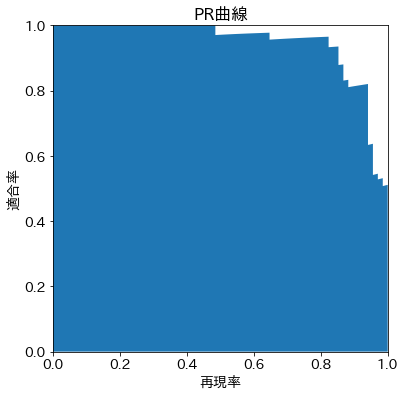

In [79]:
# 描画サイズ指定
plt.figure(figsize=(6, 6))
# グラフ領域の塗りつぶし
plt.fill_between(recall, precision, 0)
# x, y の範囲指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# ラベル・タイトル表示
plt.xlabel('再現率')
plt.ylabel('適合率')
plt.title('PR曲線')
plt.show()

In [80]:
# PR 曲線下面積の計算
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f'PR曲線下面積： {pr_auc:.4f}')

PR曲線下面積： 0.9459


In [81]:
# ROC 曲線用配列の生成

from sklearn.metrics import roc_curve

# 偽陽性率、敏感度と閾値の取得
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba1, drop_intermediate=False)

# 結果をデータフレームにする
df_roc = pd.DataFrame([thresholds, fpr, tpr]).T
df_roc.columns = ['閾値', '偽陽性率', '敏感度']

# 閾値 0.5 の周辺を表示
display(df_roc[21:91:10])

,閾値,偽陽性率,敏感度
21,0.9829,0.0000,0.3088
31,0.9025,0.0000,0.4559
41,0.7763,0.0097,0.5882
51,0.5347,0.0194,0.7206
61,0.3371,0.0388,0.8382
71,0.2027,0.1165,0.8676
81,0.1473,0.1650,0.9412


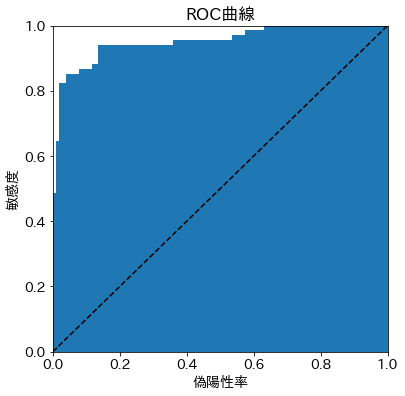

In [82]:
# ROC 曲線の描画

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 点線表示
plt.plot([0, 1], [0, 1], 'k--')

# グラフ領域の塗りつぶし
plt.fill_between(fpr, tpr, 0)

# x, y の範囲指定
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# ラベル・タイトルの表示
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title('ROC曲線')
plt.show()

In [83]:
# ROC 曲線下面積の計算
roc_auc = auc(fpr, tpr)
print(f'ROC 曲線下面積：{roc_auc:.4f}')

ROC 曲線下面積：0.9522


#### 4.4.5 入力項目の重要度

In [84]:
# 2022.4.15

# ランダムフォレストのモデルを作るまで

# サンプルデータの読み込み
import seaborn as sns
df_iris = sns.load_dataset("iris")
columns_i = ['がく片長', 'かく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# 入力データ x
x = df_iris[['がく片長', 'かく片幅', '花弁長', '花弁幅']]

# 正解データ
y = df_iris[['種別']]

# アルゴリズムの選択（ランダムフォレスト）
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# 学習
algorithm.fit(x, y)

RandomForestClassifier(random_state=123)

In [85]:
# 重要度ベクトルの取得
importances = algorithm.feature_importances_

# 項目名をキーに Series を生成
w = pd.Series(importances, index=x.columns)

# 値の大きい順にソート
u = w.sort_values(ascending=False)

print(u)

花弁長    0.4611
花弁幅    0.4257
がく片長   0.0874
かく片幅   0.0257
dtype: float64


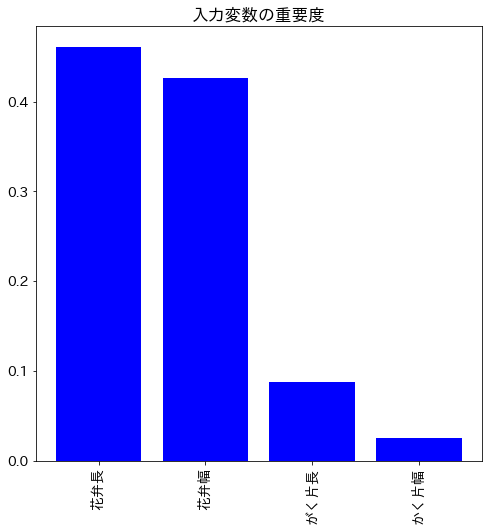

In [86]:
# 重要度の棒グラフ表示

# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')

# 項目名表示（90度回転）
plt.xticks(range(len(u)), u.index, rotation=90)

# タイトル表示
plt.title('入力変数の重要度')

plt.show()

#### 4.4.6 回帰モデルの評価方法

In [87]:
# データ読み込みからデータ分割まで

# データ読み込み（ボストン・データセット）
from sklearn.datasets import load_boston
boston = load_boston()

# df: 入力データ
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# y: 正解データ
y = boston.target

# 1項目だけの入力データ df1 を作る
df1 = df[['RM']]

# 結果確認
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


In [88]:
# アルゴリズムの選択から予測まで

# アルゴリズム： XGBRegressor
from xgboost import XGBRegressor

# RM のみを用いて学習・予測
algorithm1 = XGBRegressor(objective='reg:squarederror', 
                          random_state=random_seed)

# 学習（入力データに df1 を利用）
algorithm1.fit(df1, y)

# 予測
y_pred1 = algorithm1.predict(df1)

# 全13項目を用いて学習・予測
algorithm2 = XGBRegressor(objective='reg:squarederror', 
                          random_state=random_seed)

# 学習（入力データに df を利用）
algorithm2.fit(df, y)

# 予測
y_pred2 = algorithm2.predict(df)

In [89]:
# 結果確認
print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')


y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [25.438  20.3028 33.6333 31.4608 33.9829]
y_pred2[:5] [26.6479 22.2483 34.0721 34.315  35.4908]


In [90]:
# yの最大値と最小値の計算
y_range = np.array([y.min(), y.max()])

print(y_range)

[ 5. 50.]


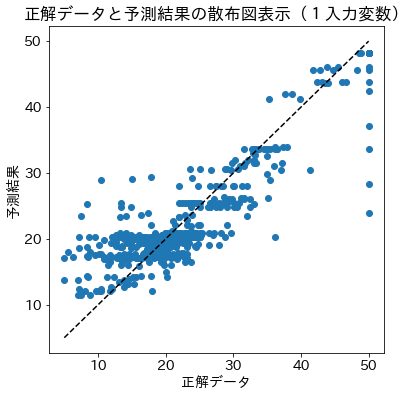

In [91]:
# 散布図による結果確認（１入力変数）

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 散布図
plt.scatter(y, y_pred1)

# 正解データ＝予測結果の直線
plt.plot(y_range, y_range, 'k--')

plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示（１入力変数）')

plt.show()

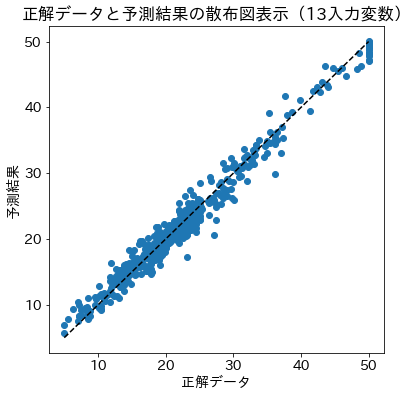

In [92]:
# 散布図による結果確認（13入力変数）

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 散布図
plt.scatter(y, y_pred2)

# 正解データ＝予測結果の直線
plt.plot(y_range, y_range, 'k--')

plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示（13入力変数）')

plt.show()

In [93]:
# r2 score の計算（１入力変数）
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(１入力変数)： {r2_score1:.4f}')

R2 score(１入力変数)： 0.7424


In [94]:
# r2 score の計算（13入力変数）
r2_score2 = r2_score(y, y_pred2)
print(f'R2 score(13入力変数)： {r2_score2:.4f}')

R2 score(13入力変数)： 0.9720


### 4.5 チューニング

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_05_tuing.ipynb

#### 4.5.1 アルゴリズムの選択

In [95]:
# 2022.4.30

# サンプルデータの読み込み
# （乳がん疾患データ）

# データのロード
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()

# 入力データ：x (30次元)
# 正解データ：y
x = cancer.data
y = cancer.target

print(f'x = {x}')
print(f'y = {y}')

x = [[ 17.99    10.38   122.8    ...   0.2654   0.4601   0.1189]
 [ 20.57    17.77   132.9    ...   0.186    0.275    0.089 ]
 [ 19.69    21.25   130.     ...   0.243    0.3613   0.0876]
 ...
 [ 16.6     28.08   108.3    ...   0.1418   0.2218   0.0782]
 [ 20.6     29.33   140.1    ...   0.265    0.4087   0.124 ]
 [  7.76    24.54    47.92   ...   0.       0.2871   0.0704]]
y = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1

In [96]:
# サンプルデータの分割

# データ分割のパラメータ
test_size = 0.1

# データ分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=random_seed, 
    stratify=y)

# 分割後サイズ確認
print(f'x.shape : {x.shape}')
print(f'x_trein.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')


x.shape : (569, 30)
x_trein.shape : (512, 30)
x_test.shape : (57, 30)


In [97]:
# 複数アルゴリズムで精度を比較
# 結果が同じになるよう random_state は同一にする

# 線形回帰
from sklearn.linear_model import LogisticRegression
algorithm_1 = LogisticRegression(random_state=random_seed)

# サポートベクターマシン（カーネル）
from sklearn.svm import SVC
algorithm_2 = SVC(kernel='rbf', random_state=random_seed)

# 決定木
from sklearn.tree import DecisionTreeClassifier
algorithm_3 = DecisionTreeClassifier(random_state=random_seed)

# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
algorithm_4 = RandomForestClassifier(random_state=random_seed)

# XGBoost
from xgboost import XGBClassifier
algorithm_5 = XGBClassifier(random_state=random_seed)

# アルゴリズムのリストを作成
algorithms = [algorithm_1, algorithm_2, algorithm_3, algorithm_4, 
              algorithm_5]
              

In [98]:
# 複数アルゴリズムで精度比較
for algorithm in algorithms:

    # 訓練データで学習
    algorithm.fit(x_train, y_train)

    # 検証データで精度測定
    score = algorithm.score(x_test, y_test)

    # アルゴリズム名を取得
    name = algorithm.__class__.__name__

    # 精度とアルゴリズム名表示
    print(f'score: {score:.4f}  {name}')
    

score: 0.9474  LogisticRegression
score: 0.8947  SVC
score: 0.9474  DecisionTreeClassifier
score: 0.9298  RandomForestClassifier
score: 0.9825  XGBClassifier


#### 4.5.2 ハイパーパラメータの最適化

In [99]:
# デフォルトパラメータの確認
algorithm = SVC(kernel='rbf', random_state=random_seed)
print(algorithm)

SVC(random_state=123)


In [100]:
# gamma の最適化

gammas = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for gamma in gammas:
    algorithm = SVC(kernel='rbf', gamma = gamma, 
                    random_state=random_seed)
    algorithm.fit(x_train, y_train)
    score = algorithm.score(x_test, y_test)
    print(f'score: {score:.4f}  gamma: {gamma}')

score: 0.6316  gamma: 1.0
score: 0.6316  gamma: 0.1
score: 0.6316  gamma: 0.01
score: 0.9474  gamma: 0.001
score: 0.9474  gamma: 0.0001
score: 0.9474  gamma: 1e-05


In [101]:
# C の最適化
# gamma は先ほど調べた最適値 0.001 を採用

Cs = [0.1, 0.5, 0.9, 1, 1.1,1.5,  10, 100, 1000, 10000]

for C in Cs:
    algorithm = SVC(kernel='rbf', 
                    gamma=0.001, C=C, 
                    random_state=random_seed)
    algorithm.fit(x_train, y_train)
    score = algorithm.score(x_test, y_test)
    print(f'score: {score:.4f}  C: {C}')

score: 0.6316  C: 0.1
score: 0.9474  C: 0.5
score: 0.9474  C: 0.9
score: 0.9474  C: 1
score: 0.9474  C: 1.1
score: 0.9474  C: 1.5
score: 0.9298  C: 10
score: 0.9298  C: 100
score: 0.9298  C: 1000
score: 0.9298  C: 10000


#### 4.5.3 交差検定法

In [102]:
# 特定のアルゴリズムに対して交差検定法を実施

# アルゴリズムの定義
algorithm = SVC(kernel='rbf', random_state=random_seed, 
                gamma=0.001, C=1)

# 分割時に正解データの分布が偏らないように StackfieldKFold を利用
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

# 交差検定の実施（分割数＝３）
from sklearn.model_selection import cross_val_score
scores = cross_val_score(algorithm, x_train, y_train, 
                         cv=stratifiedkfold)

# 平均値の計算
mean = scores.mean()

# 結果の表示
print(f'平均スコア： {mean:.4f}  個別スコア： {scores}')

平均スコア： 0.9141  個別スコア： [0.8889 0.9181 0.9353]


In [103]:
# 候補アルゴリズムのリスト作成

# 線形回帰
from sklearn.linear_model import LogisticRegression
algorithm_1 = LogisticRegression(random_state=random_seed)

# サポートベクターマシン（カーネル）チューニング後
from sklearn.svm import SVC
algorithm_2 = SVC(kernel='rbf', random_state=random_seed,
                  gamma=0.001, C=1)

# 決定木
from sklearn.tree import DecisionTreeClassifier
algorithm_3 = DecisionTreeClassifier(random_state=random_seed)

# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
algorithm_4 = RandomForestClassifier(random_state=random_seed)

# XGBoost
from xgboost import XGBClassifier
algorithm_5 = XGBClassifier(random_state=random_seed)

# アルゴリズムのリストを作成
algorithms = [algorithm_1, algorithm_2, algorithm_3, algorithm_4, 
              algorithm_5]
              

In [104]:
# 複数アルゴリズムで精度を比較

# 分割時に正解データの分布が偏らないように StratifiedKFold を利用
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    # 交差検定法の実行
    scores = cross_val_score(algorithm, x_train, y_train,
                             cv=stratifiedkfold)
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均スコア: {score:.4f}  個別スコア: {scores}  {name}')
    

平均スコア: 0.9453  個別スコア: [0.9357 0.9474 0.9529]  LogisticRegression
平均スコア: 0.9141  個別スコア: [0.8889 0.9181 0.9353]  SVC
平均スコア: 0.9062  個別スコア: [0.8713 0.9415 0.9059]  DecisionTreeClassifier
平均スコア: 0.9629  個別スコア: [0.9649 0.9591 0.9647]  RandomForestClassifier
平均スコア: 0.9590  個別スコア: [0.9591 0.9649 0.9529]  XGBClassifier


#### 4.5.4 グリッドサーチ

In [106]:
%%time

# グリッドサーチに交差検定法を組み合わせて最適なパラメータを探索

param = {
    'C': [1, 10, 100, 1000, 10000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}
algorithm = SVC(random_state=random_seed)

from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(algorithm, param, cv=stratifiedkfold)
gs.fit(x_train, y_train)

# ベストのモデルを取得し検証データを分類
best = gs.best_estimator_
best_pred = best.predict(x_test)
print(best)


SVC(C=1000, gamma=1e-05, random_state=123)
CPU times: user 2.02 s, sys: 6.84 ms, total: 2.02 s
Wall time: 2.39 s


In [107]:
# 精度の取得
score = best.score(x_test, y_test)
print(f'score: {score:.4f}')

# 混同行列を出力
from sklearn.metrics import confusion_matrix
print()
print('混同行列')
print(confusion_matrix(y_test, best_pred))

score: 0.9825

混同行列
[[20  1]
 [ 0 36]]
